In [1]:
import keras

In [2]:
from keras.datasets import fashion_mnist 

In [3]:
import numpy as np

In [4]:
from matplotlib import pyplot as plt

In [5]:
from keras.utils import to_categorical

In [6]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Train:X=(60000, 28, 28),y=(60000,)
Test:X=(10000, 28, 28),y=(10000,)


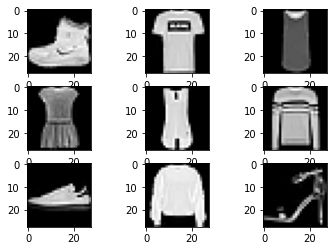

In [8]:
print('Train:X=%s,y=%s'%(X_train.shape,y_train.shape))
print('Test:X=%s,y=%s'%(X_test.shape,y_test.shape))

for i in range(9):
    plt.subplot(330+1+i)
    
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    
plt.show()    

In [9]:


#reshape dataset to have a single channel

X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [10]:
#convert from integres to flot

X_train= X_train.astype('float32')
X_test=X_test.astype('float32')

In [11]:
#norma;ization  or scaling

X_train=X_train/255
X_test=X_test/255

In [12]:
#Convert to one hot encoder
y_train_encode=to_categorical(y_train)
y_test_encode=to_categorical(y_test)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [14]:


# model = Sequential()
# model.add(Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
# model.add(MaxPool2D())
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPool2D())
# # model.add(Conv2D(128,(3,3),activation='relu'))
# # model.add(MaxPool2D())
# # model.add(Conv2D(128,(3,3),activation='relu'))
# # model.add(MaxPool2D())
# model.add(Flatten())
# model.add(Dense(10,activation='softmax'))

# model.compile(loss='categorical_crossentropy', metrics = ['accuracy'])

In [15]:
model= Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
          

In [16]:
history=model.fit(X_train,y_train_encode,batch_size=64,epochs=10)

Epoch 1/10
938/938 [==============================] - 22s 22ms/step - loss: 0.6634 - accuracy: 0.7631
Epoch 2/10
938/938 [==============================] - 20s 21ms/step - loss: 0.4436 - accuracy: 0.8374
Epoch 3/10
938/938 [==============================] - 19s 21ms/step - loss: 0.3888 - accuracy: 0.8572
Epoch 4/10
938/938 [==============================] - 19s 20ms/step - loss: 0.3526 - accuracy: 0.8712
Epoch 5/10
938/938 [==============================] - 19s 20ms/step - loss: 0.3229 - accuracy: 0.8810
Epoch 6/10
938/938 [==============================] - 19s 20ms/step - loss: 0.3033 - accuracy: 0.8886
Epoch 7/10
938/938 [==============================] - 18s 20ms/step - loss: 0.2827 - accuracy: 0.8956
Epoch 8/10
938/938 [==============================] - 18s 20ms/step - loss: 0.2667 - accuracy: 0.9018
Epoch 9/10
938/938 [==============================] - 18s 20ms/step - loss: 0.2509 - accuracy: 0.9084
Epoch 10/10
938/938 [==============================] - 18s 20ms/step - loss: 0.240

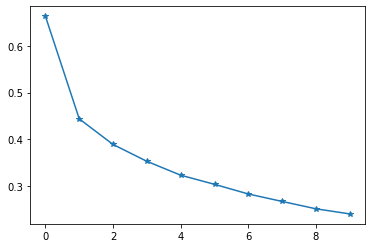

In [17]:
plt.plot(history.history['loss'],marker='*')
plt.show()

In [18]:
loss,accuracy=model.evaluate(X_test,y_test_encode)
print('Loss is ',loss)
print('Accuracy on test data',accuracy)

313/313 [==============================] - 6s 5ms/step - loss: 0.3154 - accuracy: 0.8871
Loss is  0.3154451549053192
Accuracy on test data 0.8870999813079834


In [19]:
predictions = model.predict(X_test)
np.argmax(np.round(predictions[1]))

313/313 [==============================] - 2s 4ms/step


2

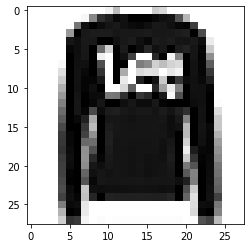

In [20]:
plt.imshow(X_test[1].reshape(28,28),cmap=plt.cm.binary)
plt.show()